University of Stirling<br>
Computing Science and Mathematics<br>
#### CSCU9YE - Artificial Intelligence<p>   
## Assignment: Organising a Colour Palette 
## Student number: 2626628       

# Reading the data file 

In [15]:
import numpy as np      # Numerical library, used keeing the list of colours and computing the Euclidean distance

# Read in the color data file 
# Input: string with file name
# Oputput: the number of colours (integer), and a list numpy arrays with all the colours
def read_data(fname):
    cols = np.loadtxt(fname, skiprows = 4) # The first 4 lines have text information, and are ignored     
    ncols = len(cols)     # Total number of colours and list of colours
    return ncols,cols

#### Data file: 100 colours dataset
The colorus are stored in a list, where each element of the list is a numpy array of dimension 3. That is arrays of 3 real numbers where the real numbers indicate the R,G, and B values of the colour (RGB colour model). 

In [16]:
ncolors, colors = read_data("col100.txt")

print(f'Number of colours: {ncolors}')
print("First 5 colours:")
print(colors[0:5,  :])

Number of colours: 100
First 5 colours:
[[0.96645354 0.4407326  0.00749147]
 [0.91097596 0.939269   0.58222757]
 [0.67156348 0.08393823 0.76648093]
 [0.23680978 0.03081402 0.78877272]
 [0.34608897 0.62328148 0.6158157 ]]


### Plotting a sequence of colours

The function <b>plot_colors()</b> displaysthe colours from the color list *col_list* the order given by the *col_order* list. 

*col_list* and *col_order* need to be of the same length. The *ratio* parameter indicates height/width proportion of each bar of colour in the plot.

In [17]:
import matplotlib.pyplot as plt

# Dsiplay the colors as a strip of color bars
# Input: list of colors, order of colors, and height/ratio

def plot_colors(col_list, col_order, ratio = 10): 
    assert len(col_list) == len(col_order)
    img = np.zeros((ratio, len(col_list), 3))
    for i in range(0, len(col_list)):
        img[:, i, :] = col_list[col_order[i]]
    fig, axes = plt.subplots(1, figsize=(10,6)) # figsize=(width,height) handles window dimensions
    axes.imshow(img, interpolation='nearest')
    axes.axis('off')
    plt.show()

# Clustering-based algorithm

### Description

I have used K-means clustring order. It is simple to implenent and can also scales large datasets. If variables are huge, then K-Means most of the times computationally faster than hierarchical clustering, if we keep k smalls. K-Means produce tighter clusters than hierarchical clustering, especially if the clusters are globular. It also generalize to clusters of different shapes and sizes, such as elliptical clusters. so I have chosen K-means clustring.

In [18]:
from sklearn.cluster import KMeans

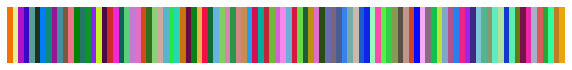

Number of Clusters -->  1
Evaluation of order: 64.7033


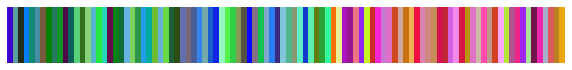

Number of Clusters -->  2
Evaluation of order: 53.8681


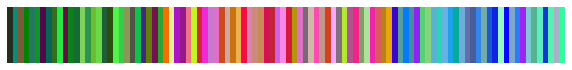

Number of Clusters -->  3
Evaluation of order: 50.1898


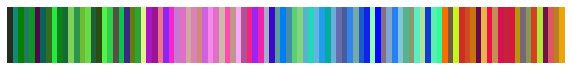

Number of Clusters -->  4
Evaluation of order: 44.7706


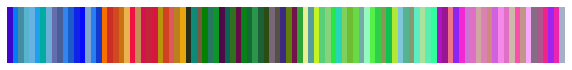

Number of Clusters -->  5
Evaluation of order: 39.7845


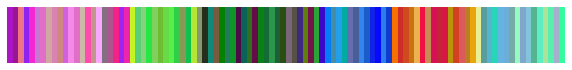

Number of Clusters -->  6
Evaluation of order: 37.5866


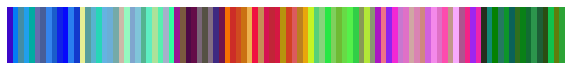

Number of Clusters -->  7
Evaluation of order: 35.3605


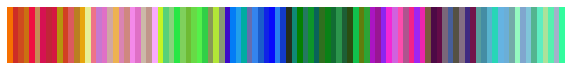

Number of Clusters -->  8
Evaluation of order: 33.9563


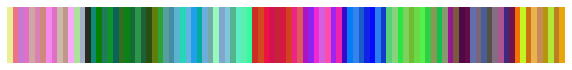

Number of Clusters -->  9
Evaluation of order: 32.8353


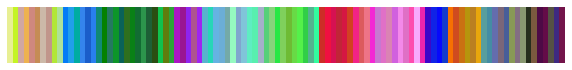

Number of Clusters -->  12
Evaluation of order: 31.9319


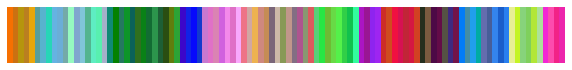

Number of Clusters -->  13
Evaluation of order: 31.781


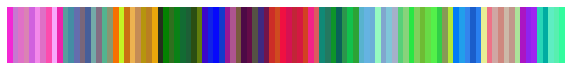

Number of Clusters -->  15
Evaluation of order: 30.8655


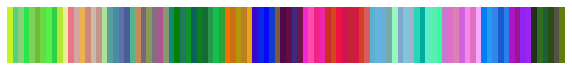

Number of Clusters -->  16
Evaluation of order: 30.1614


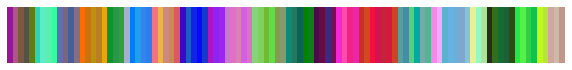

Number of Clusters -->  26
Evaluation of order: 29.9678


In [19]:
# This is an auxiliary function. It calculate the Euclidean distance between two individual colours
# Input: v and u as to be numpy arrays, vectors of real numbers with the RGB coordinates.

def euclid(v, u):
    return np.linalg.norm(v - u)

# Evaluation function.  Measures the quality of a given solution (ordering of colours) 
# The function computes the sum of the distances between all consecutive colours in the ordering
# Input: cols: list of colours 
#        ordc: ordering of colours
# Output: real number with the sumf of pair-wise differences in the colour ordering

def evaluate(cols, ordc):     
    adjacentColPairs = [[cols[ordc[i]],cols[ordc[i-1]]] for i in range(1,len(ordc))]
    return sum([euclid(i[1], i[0]) for i in adjacentColPairs])

temp = 1000
for val in range(1,len(colors)):
    model = KMeans(n_clusters=int(val)) # Intialization with threshold clusters

    model.fit(colors) # Training/Analysing
    model.predict(colors) # outputs

    labels = model.labels_ # outputs

    list_colors = labels.tolist()

    # Clustering Order
    Colors_new = []
    for i in range(len(list_colors)):
        for j in range(len(list_colors)):
            if list_colors[j] == i:
                Colors_new.append(colors[j])
    order = list(range(len(Colors_new)))   # list of consequtive numbers from 0 to ncolors  
    e2 = evaluate(Colors_new, order)
    if e2 > temp:
        continue
    temp =e2
    cl_best100 = order # Best100 output order will be saved here
    plot_colors(Colors_new, order, ratio=10)
    print("Number of Clusters --> ", val)
    print(f'Evaluation of order: {np.round(e2,4)}') # rounding to display only 4 decimals. This is better for display

#### Data file: 500 colours dataset
The colorus are stored in a list, where each element of the list is a numpy array of dimension 3. That is arrays of 3 real numbers where the real numbers indicate the R,G, and B values of the colour (RGB colour model).

In [20]:
ncolors, colors = read_data("col500.txt")

print(f'Number of colours: {ncolors}')
print("First 5 colours:")
print(colors[0:5,  :])

Number of colours: 500
First 5 colours:
[[0.96645354 0.4407326  0.00749147]
 [0.91097596 0.939269   0.58222757]
 [0.67156348 0.08393823 0.76648093]
 [0.23680978 0.03081402 0.78877272]
 [0.34608897 0.62328148 0.6158157 ]]


In [ ]:
temp = 1000
for val in range(1,len(colors)):
    model = KMeans(n_clusters=int(val)) # Intialization with threshold clusters

    model.fit(colors) # Training/Analysing
    model.predict(colors) # outputs

    labels = model.labels_ # outputs

    list_colors = labels.tolist()

    # Clustering Order
    Colors_new = []
    for i in range(len(list_colors)):
        for j in range(len(list_colors)):
            if list_colors[j] == i:
                Colors_new.append(colors[j])
    order = list(range(len(Colors_new)))   # list of consequtive numbers from 0 to ncolors  
    e2 = evaluate(Colors_new, order)
    if e2 > temp:
        continue
    temp =e2
    cl_best500 = order # Best500 output order will be saved here
    plot_colors(Colors_new, order, ratio=10)
    print("Number of Clusters --> ", val)
    print(f'Evaluation of order: {np.round(e2,4)}') # rounding to display only 4 decimals. This is better for display

Number of Clusters -->  1
Evaluation of order: 327.9166


Number of Clusters -->  2
Evaluation of order: 279.6323


Number of Clusters -->  3
Evaluation of order: 247.2766


Number of Clusters -->  4
Evaluation of order: 221.2745


Number of Clusters -->  5
Evaluation of order: 201.5586


Number of Clusters -->  6
Evaluation of order: 185.4743


Number of Clusters -->  7
Evaluation of order: 174.5643


Number of Clusters -->  8
Evaluation of order: 167.3566


Number of Clusters -->  9
Evaluation of order: 160.105


Number of Clusters -->  10
Evaluation of order: 155.3019


Number of Clusters -->  11
Evaluation of order: 150.7888


Number of Clusters -->  12
Evaluation of order: 144.5124


Number of Clusters -->  14
Evaluation of order: 141.0895


Number of Clusters -->  15
Evaluation of order: 137.2335


Number of Clusters -->  16
Evaluation of order: 135.6191


Number of Clusters -->  18
Evaluation of order: 134.2838


Number of Clusters -->  19
Evaluation of order: 129.6879


Number of Clusters -->  20
Evaluation of order: 126.698


Number of Clusters -->  22
Evaluation of order: 124.507


Number of Clusters -->  23
Evaluation of order: 123.3689


Number of Clusters -->  24
Evaluation of order: 122.2135


Number of Clusters -->  25
Evaluation of order: 120.8864


Number of Clusters -->  26
Evaluation of order: 119.4362


Number of Clusters -->  28
Evaluation of order: 119.159


Number of Clusters -->  29
Evaluation of order: 114.3276


Number of Clusters -->  33
Evaluation of order: 113.7963


Number of Clusters -->  35
Evaluation of order: 112.6933


Number of Clusters -->  36
Evaluation of order: 110.2811


Number of Clusters -->  37
Evaluation of order: 109.5035


Number of Clusters -->  42
Evaluation of order: 108.9682


Number of Clusters -->  45
Evaluation of order: 108.7109


Number of Clusters -->  47
Evaluation of order: 107.9045


Number of Clusters -->  57
Evaluation of order: 107.2224


### Training K Means Clustering algorithm using different clusters and comparing the ecludian distances between the colors to get the best outcome. Best output will be saved as final output.